# Import Libraries

In [23]:
# Note that "MyNLPToolBox" is written entirely by me from scratch :D
from MyNLPToolBox import TextPreprocessor
from MyNLPToolBox.WordEmbedders import TFIDFVectorizer
from MyNLPToolBox.TextVisualizer import CountPlot
from MyNLPToolBox import FilePickling as FP
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import pandas as pd
import numpy as np

# Load data from .json

In [2]:
df = pd.read_json('data.json',lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


# Preprocessing data

In [3]:
# Modes of preprocessing data
modes = ('remove_unicode', 'remove_special', 'lowercase', 'remove_accents')
TextPreprocessor.process(df,modes)


Progress..98%Done


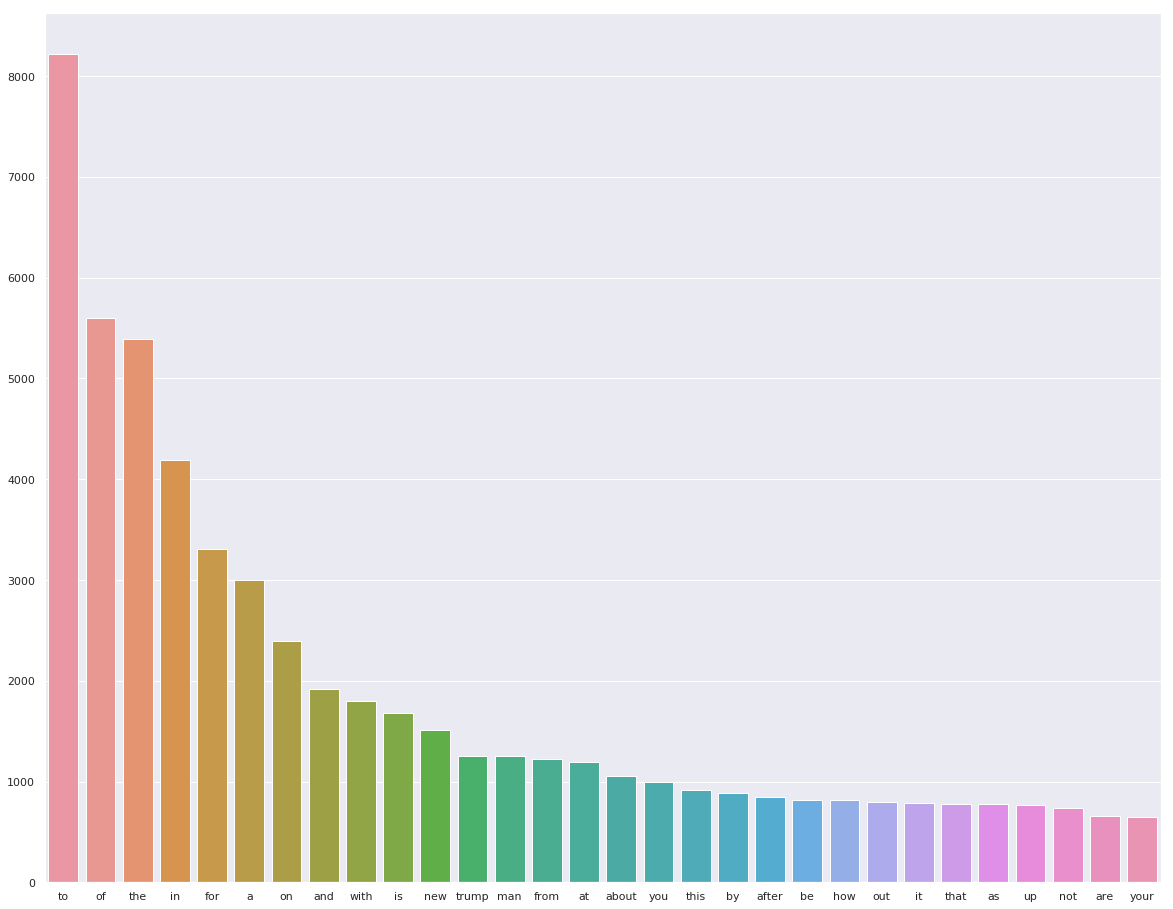

In [4]:
CountPlot(df)

It can be seen that the words that appear most often are stopwords and do not make much sense in representing a meaning of a sentence. Therefore, we will consider deleting them from the dataset. Note that our corpus set is very small (26k words), so we will not delete stopwords based on the number of times it appears, because there are stopwords that aren't used much. Instead, we will use the stopwords available online.

In [3]:
TextPreprocessor.process(df,['remove_stopwords'])
headlines_train = df['headline'][:20000]
headlines_test = df['headline'][20000:]
y_train = df['is_sarcastic'][:20000]
y_test = df['is_sarcastic'][20000:]

Count & Plot Progress..99%Done


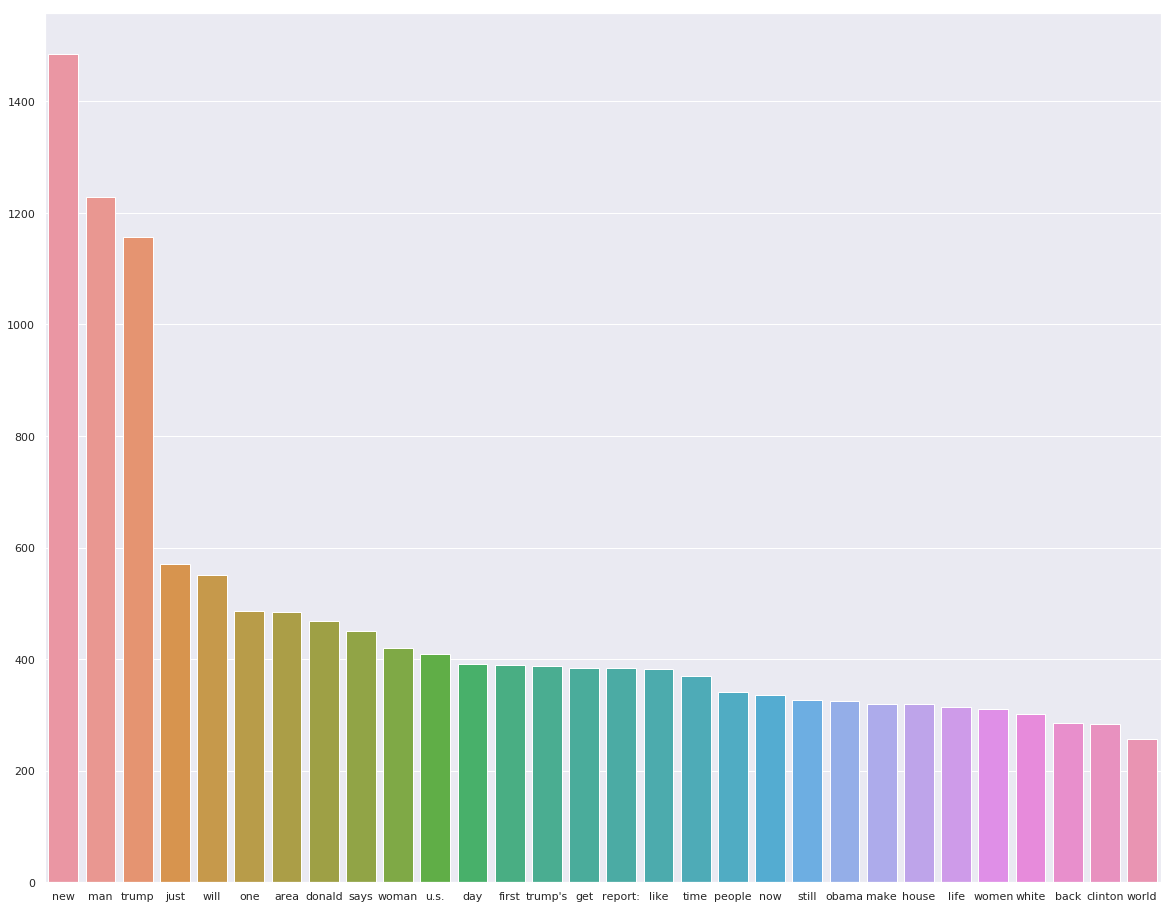

In [4]:
CountPlot(df)

# Embedding text with different methods and comparing the result

In [7]:
Vectorizer = TFIDFVectorizer(mode='natural').fit(df['headline'])

## Natural TFIDF

In [17]:
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
model_lr = LogisticRegression().fit(x_train,y_train)
y_test_pred = model_lr.predict(x_test)
print('====\nLOGISTIC REGRESSION')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

model_nb = MultinomialNB().fit(x_train,y_train)
y_test_pred = model_nb.predict(x_test)
print('====\nNAIVE BAYES')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

Performing Tf..98% Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing Idf.. Done!
Performing Tfidf.. Done!


/home/truongphatuit/.conda/envs/tf2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====
LOGISTIC REGRESSION
Accuracy:  0.7853629452973617
Precision Score:  0.781557067271353
Recall Score:  0.70580204778157
F1 Score:  0.7417503586800575
====
NAIVE BAYES
Accuracy:  0.7749291995826502
Precision Score:  0.7183271832718328
Recall Score:  0.7972696245733788
F1 Score:  0.755742478162407


## Logarithmic TFIDF

In [18]:
Vectorizer.change_mode('log')
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
model_lr = LogisticRegression().fit(x_train,y_train)
y_test_pred = model_lr.predict(x_test)
print('====\nLOGISTIC REGRESSION')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

model_nb = MultinomialNB().fit(x_train,y_train)
y_test_pred = model_nb.predict(x_test)
print('====\nNAIVE BAYES')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

Performing Tf..98% Done!
Performing LogTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing LogTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!


/home/truongphatuit/.conda/envs/tf2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====
LOGISTIC REGRESSION
Accuracy:  0.7852138917871516
Precision Score:  0.7814744801512288
Recall Score:  0.7054607508532423
F1 Score:  0.7415246636771301
====
NAIVE BAYES
Accuracy:  0.7752273066030705
Precision Score:  0.7186346863468634
Recall Score:  0.7976109215017065
F1 Score:  0.7560659980588805


## Boolean TFIDF

In [20]:
Vectorizer.change_mode('boolean')
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
model_lr = LogisticRegression().fit(x_train,y_train)
y_test_pred = model_lr.predict(x_test)
print('====\nLOGISTIC REGRESSION')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

model_nb = MultinomialNB().fit(x_train,y_train)
y_test_pred = model_nb.predict(x_test)
print('====\nNAIVE BAYES')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

Performing Tf..98% Done!
Performing BooleanTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing BooleanTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!


/home/truongphatuit/.conda/envs/tf2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====
LOGISTIC REGRESSION
Accuracy:  0.7834252496646296
Precision Score:  0.7800530906332954
Recall Score:  0.7020477815699658
F1 Score:  0.7389976648104905
====
NAIVE BAYES
Accuracy:  0.775674467133701
Precision Score:  0.7188940092165899
Recall Score:  0.7986348122866894
F1 Score:  0.7566693613581245


## Augmented TFIDF

In [21]:
Vectorizer.change_mode('augmented')
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
model_lr = LogisticRegression().fit(x_train,y_train)
y_test_pred = model_lr.predict(x_test)
print('====\nLOGISTIC REGRESSION')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

model_nb = MultinomialNB().fit(x_train,y_train)
y_test_pred = model_nb.predict(x_test)
print('====\nNAIVE BAYES')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

Performing Tf..98% Done!
Performing AugTf..98% Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing AugTf..97% Done!
Performing Idf.. Done!
Performing Tfidf.. Done!


/home/truongphatuit/.conda/envs/tf2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====
LOGISTIC REGRESSION
Accuracy:  0.7841705172156804
Precision Score:  0.7785714285714286
Recall Score:  0.7068259385665528
F1 Score:  0.7409660107334526
====
NAIVE BAYES
Accuracy:  0.7747801460724401
Precision Score:  0.7178385016886706
Recall Score:  0.7979522184300342
F1 Score:  0.755778244706643


# Save file down to build model

In [24]:
Vectorizer.change_mode('natural')
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
FP.save_obj(x_train,'x_train_natural')
FP.save_obj(x_test,'x_test_natural')
Vectorizer.change_mode('log')
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
FP.save_obj(x_train,'x_train_log')
FP.save_obj(x_test,'x_test_log')
Vectorizer.change_mode('boolean')
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
FP.save_obj(x_train,'x_train_boolean')
FP.save_obj(x_test,'x_test_boolean')
Vectorizer.change_mode('augmented')
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
FP.save_obj(x_train,'x_train_augmented')
FP.save_obj(x_test,'x_test_augmented')




Performing Tf..98% Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..98% Done!
Performing LogTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing LogTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..98% Done!
Performing BooleanTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing BooleanTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..98% Done!
Performing AugTf..98% Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing AugTf..97% Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
